In [60]:
import pandas as pd
import os
from utilities import get_info_from_txt
from measurements import get_measurements_from_data
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
name = r'G:\ImagesForNewModel\Processed_by_Folder\training - Original'
Files = os.listdir(name)            
ext=('.png', '.jpg', '.jpeg', '.bmp','.tif', '.tiff', '.PNG', '.JPG', '.JPEG', '.BMP', 'TIF', 'TIFF')
Files = [i for i in Files if i.endswith(tuple(ext))]

In [49]:
i_want=[]
i_dont_want = []
for file in Files:
    code_name = file.split('_')[-1].split('.')[0]
    if code_name =='3' or code_name == '4':
        i_want.append(file)
    else :
        i_dont_want.append(file)

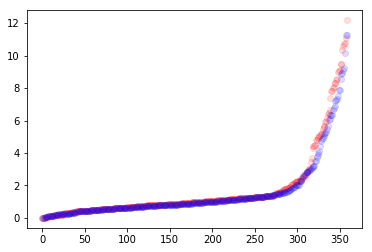

In [58]:
CalibrationType='Iris'
CalibrationValue=11.77
eye_left=[]
eye_right=[]
for file in i_want:
    
    txt_file = os.path.join(name, file[:-3]+'txt')
    shape_, lefteye_, righteye_, boundingbox_ = get_info_from_txt(txt_file)
    try:
        Left, Right, _, _,_= get_measurements_from_data(shape_, lefteye_,righteye_, CalibrationType, CalibrationValue)
        eye_left.append(Left.PalpebralFissureHeight)
        eye_right.append(Right.PalpebralFissureHeight)
    except: 
        pass

eye_left.sort()
eye_right.sort()
plt.figure(0)
plt.plot(eye_left,'ro', alpha=0.125)
plt.plot(eye_right,'bo', alpha = 0.125)  

In [40]:
len(eye_left), len(eye_right)

(359, 359)

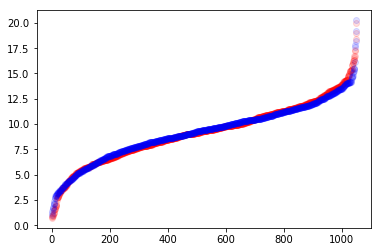

In [59]:
CalibrationType='Iris'
CalibrationValue=11.77
eye_open_left=[]
eye_open_right=[]
for file in i_dont_want:
    
    txt_file = os.path.join(name, file[:-3]+'txt')
    shape_, lefteye_, righteye_, boundingbox_ = get_info_from_txt(txt_file)
    try:
        Left, Right, _, _,_= get_measurements_from_data(shape_, lefteye_,righteye_, CalibrationType, CalibrationValue)
        eye_open_left.append(Left.PalpebralFissureHeight)
        eye_open_right.append(Right.PalpebralFissureHeight)
    except: 
        pass

eye_open_left.sort()
eye_open_right.sort()
plt.figure(0)
plt.plot(eye_open_left, 'ro', alpha=0.125)
plt.plot(eye_open_right,'bo', alpha=0.125)  